#Modelos de regresión regularizados

La regularización es una estrategia para reducir la complejodad de los modelos a través del control del tamaño de sus coeficientes. En el caso de la regulación **Lasso** o $L_1$, se anulan algunos coeficientes, mientras en **Ridge** o $L_2$ se le asignan valores muy pequeños

In [ ]:
#Importamos librerias iniciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


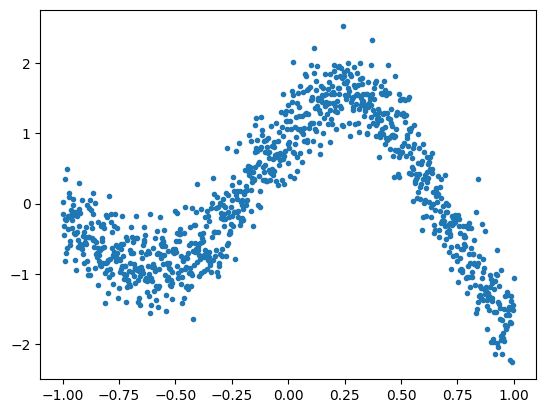

In [ ]:
#Para ejemplificar, trabajaresmos con el toyset de la regresión líneal

X = np.linspace(-1, 1, 1000)
ruido = np.random.normal(0, 0.333, 1000)

y = np.sin(4*X) + np.cos(3*X) + ruido

#Graficamos el toyset
plt.plot(X, y, '.');

In [ ]:
#Vamos a ajustar el modelo como lo hicimos en el caso de la regresión múltiple con el polinomio de grado 5

#Importamos las librerias adicionales
from sklearn.model_selection import cross_val_score #Para la validación cruzada
from sklearn.pipeline import Pipeline # Para generar la pipeline de procesamiento
from sklearn.preprocessing import PolynomialFeatures #Para generar las características
from sklearn.linear_model import LinearRegression #Modelo de regresión

In [ ]:
#Reorganizamos las dimenciones de X
X = X.reshape(-1, 1)

#Generamos el pipeline
pipe = Pipeline([("poly", PolynomialFeatures()),
                  ("model", LinearRegression(fit_intercept=True))])

#Generamos los posibles grados del polinomio para que sean sintonizados
degrees = range(2,16)

#Iniciamos la lista de scores que será nuestra métrica de calidad del modelo
scores = []

#Iniciamos la lista lista del promedio de los scores
mean_scores = []

In [ ]:
#Construimos el ciclo para recorrer los hiperparámetros (en este caso solo el gradp) con la validación cruzada, calculando el socre para cada uno de ellos

for degree in degrees:
  score = cross_val_score(estimator = pipe.set_params(poly__degree = degree),
                            X = X, y = y, cv = 5, scoring = "neg_mean_squared_error")
  scores.append(score)
  mean_scores.append(-score.mean())

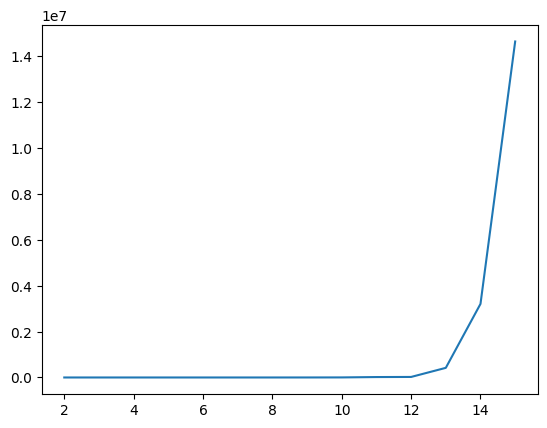

In [ ]:
#Visualizamos el resultado
plt.plot(degrees, mean_scores, '-');

In [ ]:
#Númericamente, tendremos el siguiente RMSE

print(f"El mejor RMSE para el conjunto de entrenamiento es {min(mean_scores):.2f}")

El mejor RMSE para el conjunto de entrenamiento es 0.23


#Sintonización de parámetros

Vamos a aplicar la regularización al modelo para ver si mejora el desempeño. En este caso tendremos que sintonizar el parámetro $\lambda \

## Regularización de $L_2$ (Rigde)

In [ ]:
#Importamos librerías adicionales
from sklearn.linear_model import Ridge #para el modelo de regresión Ridge
from sklearn.metrics import mean_squared_error #para calcular el RMSE
from sklearn.model_selection import train_test_split #para dividir el conjunto de entreros

In [ ]:
#Revisamos la partición de los datos en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
#Generamos las características polinómicas, ya que el grado está sintonizado
poly = PolynomialFeatures(degree = 5)
X_train_p = poly.fit_transform(X_train) #X_train polinómico

#Instanciar el modelo
model = Ridge()

#Generamos los posibles valores de lambda (al que llamaremos alpha) para la regularización
alpha = np.logspace(-4,2)

#Creamos un diccionario con todos los hiperparámetros a sintonizar
grid = dict(alpha = alpha)

#Importamos librerías adicionales
from sklearn.model_selection import GridSearchCV #Para la búsqueda de hiperparámetros

#Generamos la búsqueda por grip o exhaustiva
grid_search = GridSearchCV(estimator = model, param_grid = grid, n_jobs=1, cv = 5,
                           scoring = "neg_mean_squared_error")

#Generaamos la búsqueda con el conjunto de entrenamiento
grid_result = grid_search.fit(X_train_p, y_train)

In [ ]:
#Extraemos el valor del hiperparámetro sintonizado
best_alpha = grid_result.best_params_["alpha"]

#Visualizamos la información
print(f"El mejor RMSE fue de {-grid_result.best_score_:.2f}, con una lambda de {best_alpha}")

El mejor RMSE fue de 0.11, con una lambda de 0.003906939937054617


In [ ]:
#Ahora evaluamos el modelo con el conjunto de test o los datos de prueba

#Tomamos el mejor modelo de la búsqueda
best_model = grid_search.best_estimator_

#Transformamos los datos de prueba a las características polinómicas
X_test_p = poly.transform(X_test)

#Predecimos con el conjunto de prueba
y_pred = best_model.predict(X_test_p)

#Calculamos el RMSE
RMSE = mean_squared_error(y_test, y_pred)

#Visualizamos el resultado
print(f"El RMSE para el conjunto de prueba es {RMSE:.2f}")

El RMSE para el conjunto de prueba es 0.10


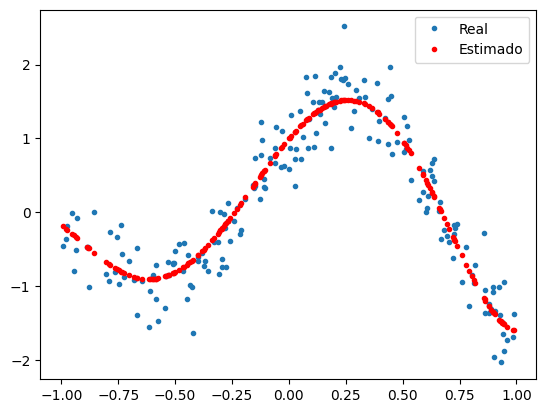

In [ ]:
#Gráficamente, tendremos:

plt.plot(X_test, y_test, '.', label = "Real");
plt.plot(X_test, y_pred, '.r', label = "Estimado");
plt.legend();

#Ejemplo

Cargar el archivo `auto-mpg.data`. Asigna a las columnas los nombres indicados en el archivo `auto-mpg.names`. Configura como índice la variable `car_name`.

Realiza el modelo de regresión Ridge que prediga la variable `mpg`usando todas las demás variables como predictorias. Para ello realiza una particición de los datos en subconjunto de entrenamiento y prueba con una proporción de 70/30, usando `random_state = 1`

Reporta el valor de $λ$ encontrado, el RMSE de entrenamiento y el de prueba y los pesos del modelo.

Repite este ejercicio con un modelo de regresión Lasso.


In [ ]:
#Cargamos el archivo
import pandas as pd
import numpy as np
import matplotlib.pyplot

carros = pd.read_csv("/content/drive/MyDrive/Aprendizaje Supervisado/Bases de Datos/auto-mpg.data", sep = "\s+", header = None, na_values = ["?"], names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"])

In [ ]:
carros.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
#Revisamos la calidad de los datos con un pequeño EDA
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [ ]:
#En una tarea de ML supervisado, la variable a predecir debe ser la de mejor calidad, por ello vamos a tomar SOLO los registros para los cuales mpg sea solo nulo
carros = carros[carros["mpg"].notnull()]

In [ ]:
#Dado la naturaleza del conjunto de datos, es posible imputar los datos faltantes de la variable housepower
carros["horsepower"].fillna(value = carros["horsepower"].mean(),inplace=True)

#Fijamosel index en la variable car_name
carros.set_index("car_name", inplace=True)

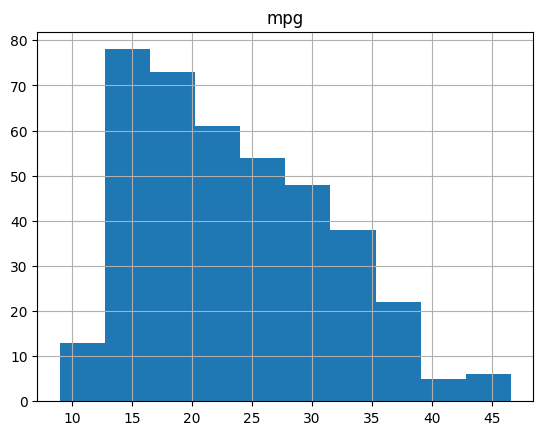

In [ ]:
#Gráficamos el histograma y el diagrama de cajas y bigotes para identificar posibles datos atípicos (como primera visualización)
carros.hist(column="mpg")
plt.show()

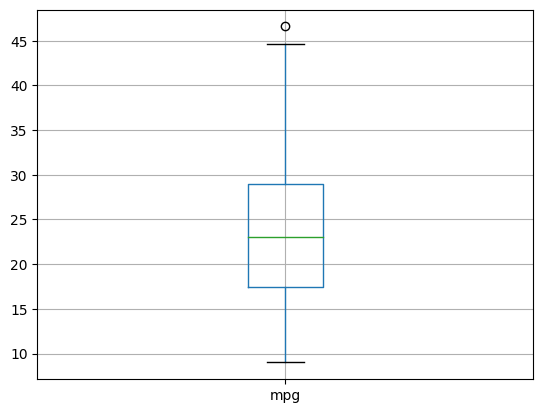

In [ ]:
carros.boxplot(column="mpg")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

#Tomamos las variables predictorias en X y la varaible a predecir en y
X = carros.drop("mpg", axis = 1)
y = carros["mpg"]

#Realizamos la partición de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## Ridge


In [ ]:
#Instanciamos el modelo
model = Ridge()

#Creamis el diccionario
grid = dict(alpha = np.logspace(-4,2))

#Instanciamos la búsqueda
grid_search = GridSearchCV(estimator = model, param_grid = grid, n_jobs=1, cv = 5,
                           scoring = "neg_mean_squared_error")

#Generaamos la búsqueda
grid_result = grid_search.fit(X_train, y_train)

In [ ]:
#Mostramos el mejor RMSE con el hiperparámetro sintonizado
print(f"El mejor RMSE fue de {-grid_result.best_score_:.2f}, con una lambda de {grid_result.best_params_['alpha']}")

El mejor RMSE fue de 12.88, con una lambda de 32.3745754281764


##Lasso

In [ ]:
#Para ignorar los warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#Importamos el modelo lasso
from sklearn.linear_model import Lasso

#Importamos la lista de coeficientes
coeficientes = []

#Definimos los posibles valores que pueden tomar lambda (alpha)
alphas = [0, 0.01, 0.1, 1, 10, 100]
#Creamos el ciclo para la sintonización de lambda
for alpha in alphas:
  #instanciamos el modelo
  model = Lasso(alpha = alpha)
  #Entrenamos el modelo
  model.fit(X_train, y_train)
  #Guardamos los coeficientes
  coeficientes.append(model.coef_)

#Creamos una tabla con los coeficientes de las características para analizar la contribución de cada una ella a la regresión

df_lasso = pd.DataFrame(data = coeficientes, columns = model.feature_names_in_, index = alphas)

#Mostramos la tabla
df_lasso

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0.00,-0.394579,0.022756,-0.019285,-0.007056,0.064152,0.793118,1.191301
0.01,-0.346630,0.021702,-0.019314,-0.007046,0.059602,0.792189,1.157844
0.10,-0.000000,0.013601,-0.019558,-0.006954,0.019785,0.783488,0.866682
1.00,-0.000000,0.004737,-0.011075,-0.006872,0.000000,0.700973,0.000000
10.00,-0.000000,-0.004274,-0.013592,-0.006636,0.000000,0.000000,0.000000
100.00,-0.000000,-0.000000,-0.000000,-0.007517,0.000000,0.000000,0.000000


In [ ]:
#En este caso, entrenamos con alpha = 0.1 y alpha = 1, para alpha = 0.1

model = Lasso(alpha = 0.10)
#Entrenamos el modelo
model.fit(X_train, y_train)
#Calculamos el error cuadrático medio para train y para test
train_error = mean_squared_error(y_train, model.predict(X_train))
test_error = mean_squared_error(y_test, model.predict(X_test))

#Mostramos los resultados
print(f"El error cuadrático medio para el conjunto de entrenamiento es {train_error:.2f}")
print(f"El error cuadrático medio para el conjunto de prueba es {test_error:.2f}")

El error cuadrático medio para el conjunto de entrenamiento es 11.96
El error cuadrático medio para el conjunto de prueba es 9.23


In [ ]:
#En este caso, entrenamos con alpha = 0.1 y alpha = 0.01, para alpha = 0.01

model = Lasso(alpha = 0.01)
#Entrenamos el modelo
model.fit(X_train, y_train)
#Calculamos el error cuadrático medio para train y para test
train_error = mean_squared_error(y_train, model.predict(X_train))
test_error = mean_squared_error(y_test, model.predict(X_test))

#Mostramos los resultados
print(f"El error cuadrático medio para el conjunto de entrenamiento es {train_error:.2f}")
print(f"El error cuadrático medio para el conjunto de prueba es {test_error:.2f}")

El error cuadrático medio para el conjunto de entrenamiento es 11.89
El error cuadrático medio para el conjunto de prueba es 8.97


#Preproesamiento como parte del flujo de trabajo en modelos líneales

Idealmente, el preprocesamiento se debe incluir en el *pipeline* de sintonización de hiperparámetros, pero para efectos ilustrativos lo haremos como una etapa anterior.

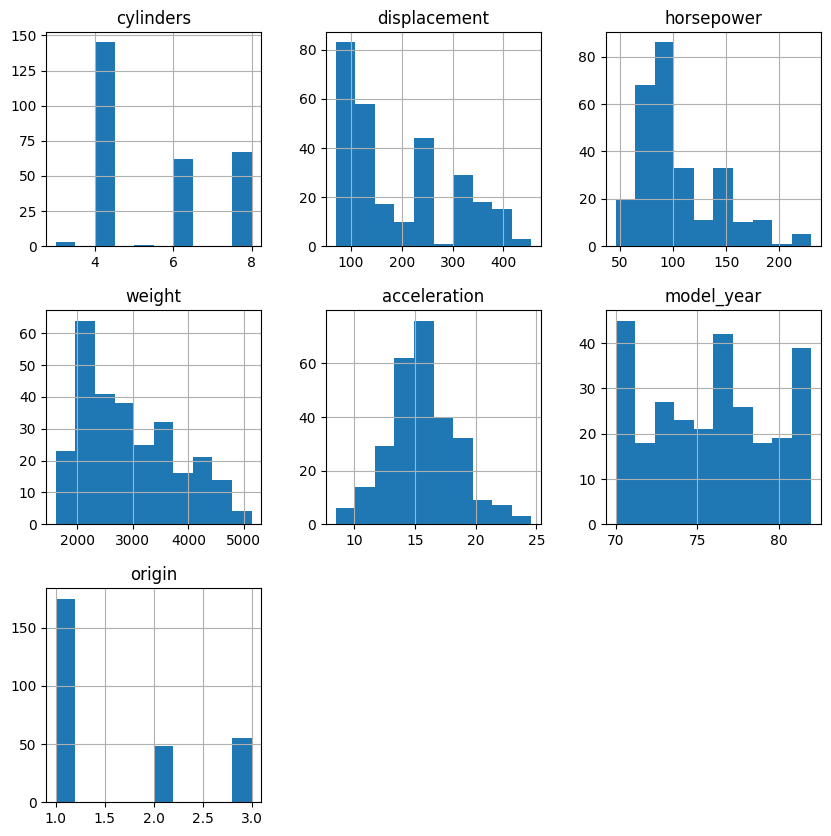

In [ ]:
#Revisamos los histogramans como aproximación a la distrubución de probabilidad de cada una de las características de entrenamiento (variables predictorias)
X_train.hist(figsize = (10,10));

Las variables *Cylinders*, *Origin* son consideras discretas y es posible no aplicar ningún preprocesamiento.
El *model year* se pueden considerar discreto pero dada su distribución se puede aplicar un `MinMaxScaler`. La variable `weight`tiene una distribución con sesgo, por ello es mejor aplicar una transformación logarítmica. Para el caso de la variable `acceleration` es un poco más conveniente aplica una estandarización.

In [ ]:
#Definimos las librerías para el preprocesamiento
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler

#Instanciamos los preprocesadores
scaler = StandardScaler()
minmax = MinMaxScaler()
power = PowerTransformer()

#Definimos las listas de variables para cada uno de los casos
features_scaler = ["acceleration"]
features_minmax = ["horsepower", "model_year", "displacement"]
features_power = ["weight"]

#Aplicamos el preprocesamiento
X_scaler = scaler.fit_transform(X[features_scaler])
X_minmax = minmax.fit_transform(X[features_minmax])
X_power = power.fit_transform(X[features_power])

#Concatenamos todas las variables nuevamente en una sola x
X_pre = np.concatenate((X_scaler, X_minmax, X_power, X[["origin"]], X[['cylinders']]), axis = 1)

In [ ]:
#Aplicamos la regularización en la regresión como anteriormente

X_train_p, X_test_p, y_train, y_test = train_test_split(X_pre,y, test_size = 0.3, random_state = 1)

#Instanciamos el modelo
model = Lasso()

#Armamos el grid para escoger el lambda
grid = dict(alpha = np.logspace(-4,2))

#Instanciamos la búsqueda
grid_search = GridSearchCV(estimator = model, param_grid = grid, n_jobs=1, cv = 5,
                           scoring = "neg_mean_squared_error")

#Generaamos la búsqueda
grid_search.fit(X_train_p, y_train)
#Imprimimos el mejor score
print(f"El mejor RMSE fue de {-grid_search.best_score_:.2f}, con una lambda de {grid_search.best_params_['alpha']}")

El mejor RMSE fue de 10.25, con una lambda de 0.009102981779915217


In [ ]:
#Calculamos la métrica con el conjunto de test
test_error = mean_squared_error(y_test, grid_search.predict(X_test_p))

In [ ]:
test_error

8.239025060543286